In [1]:
from google.colab import files
uploaded = files.upload()

Saving INC_cleaned.csv to INC_cleaned.csv


In [2]:
import pandas as pd

# Charger les données
data = pd.read_csv("INC_cleaned.csv")
data.head()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LOS_ICU_days,first_ICU_stay,TIMER,STARTTIME,GLCTIMER,ENDTIME,INPUT,INPUT_HRS,INSULINTYPE,EVENT,GLC,GLCSOURCE,INFXSTOP
0,11861,192256,200010,1,1,2132-08-05 01:00:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 01:00:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,149.0,FINGERSTICK,0.0
1,11861,192256,200010,1,1,2132-08-05 02:22:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 02:22:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,127.0,BLOOD,0.0
2,11861,192256,200010,1,1,2132-08-05 03:22:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 03:22:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,127.0,BLOOD,0.0
3,11861,192256,200010,1,1,2132-08-05 09:29:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 09:29:00+00:00,2167-08-10 23:01:00 UTC,7.635692,4.0,Short,BOLUS_INYECTION,247.0,FINGERSTICK,0.0
4,11861,192256,200010,1,1,2132-08-05 10:00:00 UTC,2132-08-05 10:00:00+00:00,2132-08-05 09:29:00+00:00,2132-08-05 10:01:00 UTC,4.000000,4.0,Short,BOLUS_INYECTION,135.0,FINGERSTICK,0.0


Mean Squared Error: 0.0847183790647601
R² Score: 0.9994951595861192
Accuracy: 0.9918953238005852


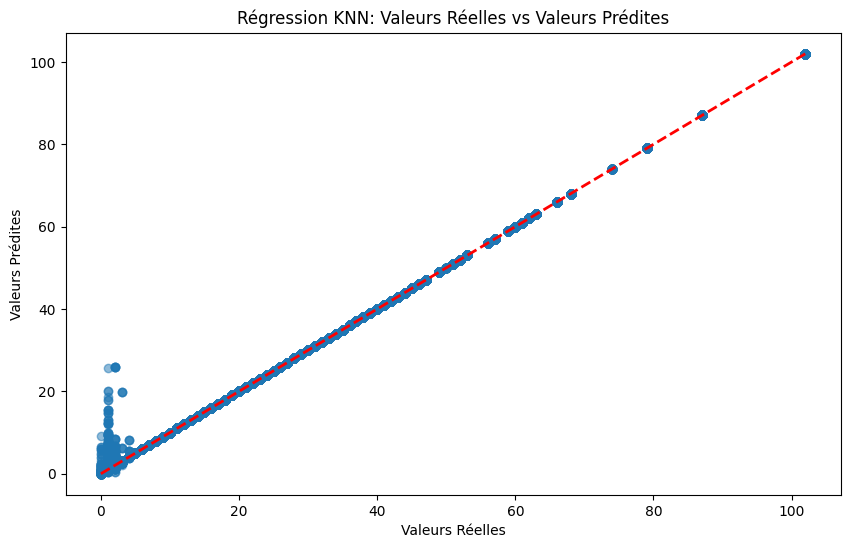

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données nettoyées
df = pd.read_csv("INC_cleaned.csv")

# Séparation des caractéristiques (X) et de la variable cible (y)
X = df.drop(columns=['LOS_ICU_days', 'TIMER', 'STARTTIME', 'GLCTIMER', 'ENDTIME', 'INSULINTYPE', 'GLCSOURCE', 'EVENT'])  # Caractéristiques
y = df['LOS_ICU_days']  # Variable cible

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation du régresseur KNN
clf = KNeighborsRegressor()

# Entraînement du régresseur sur les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = clf.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et du coefficient de détermination (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Définir une fonction pour calculer la précision dans une tolérance donnée
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)

# Calculer la précision avec une tolérance de 10%
accuracy = regression_accuracy(y_test, y_pred, tolerance=0.1)
print("Accuracy:", accuracy)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Régression KNN: Valeurs Réelles vs Valeurs Prédites')
plt.show()


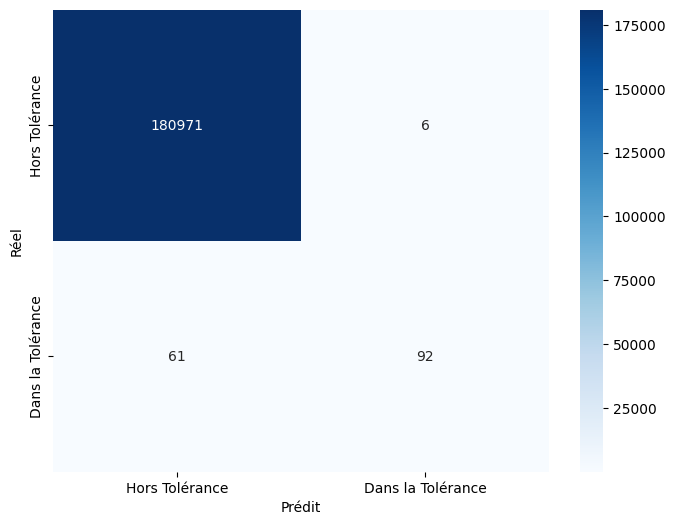

In [6]:
#Matrice de confusion
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
# Définition de la fonction pour obtenir la matrice de confusion avec seuil de tolérance
def confusion_matrix_with_tolerance(y_true, y_pred, tolerance=0.1):
    y_true_discrete = np.round(y_true)
    y_pred_discrete = np.round(y_pred)
    cm = confusion_matrix(y_true_discrete <= tolerance, y_pred_discrete <= tolerance)
    return cm

# Calcul de la matrice de confusion
cm = confusion_matrix_with_tolerance(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hors Tolérance', 'Dans la Tolérance'], yticklabels=['Hors Tolérance', 'Dans la Tolérance'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
#plt.title('Matrice de Confusion')
plt.show()


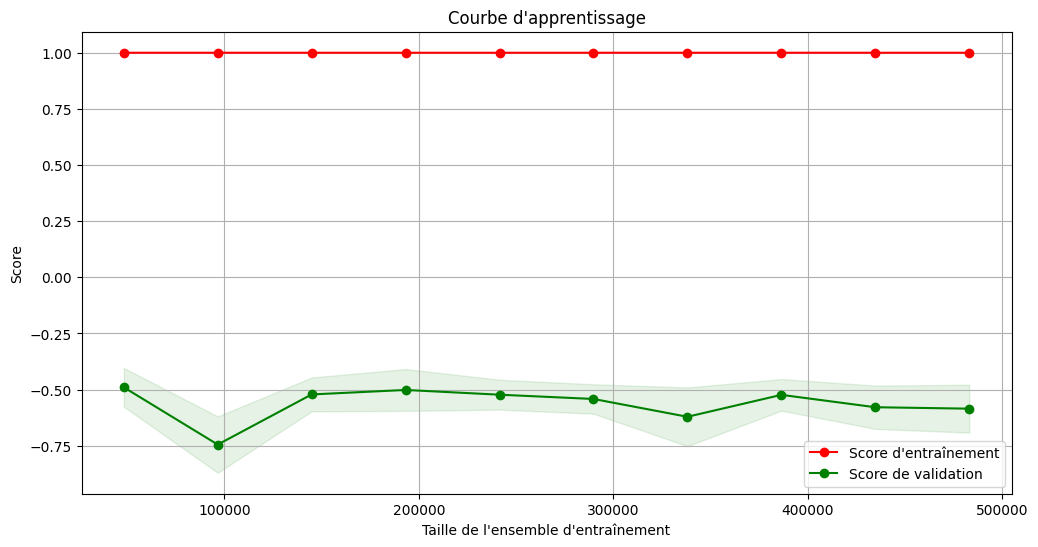

In [7]:
#Courbe d'apprentissage
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='Score de validation')

plt.legend(loc='best')
plt.show()


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialisation du régresseur d'arbre de décision
clf = DecisionTreeRegressor()

# Entraînement du régresseur sur les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = clf.predict(X_test)

# Calcul de l'erreur quadratique moyenne du modèle
mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

# Définir une fonction pour calculer la précision dans une tolérance donnée
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)

# Calculer la précision avec une tolérance de 10%
accuracy = regression_accuracy(y_test, y_pred, tolerance=0.1)
print("Accuracy ", accuracy)


Accuracy  0.9994644730304202


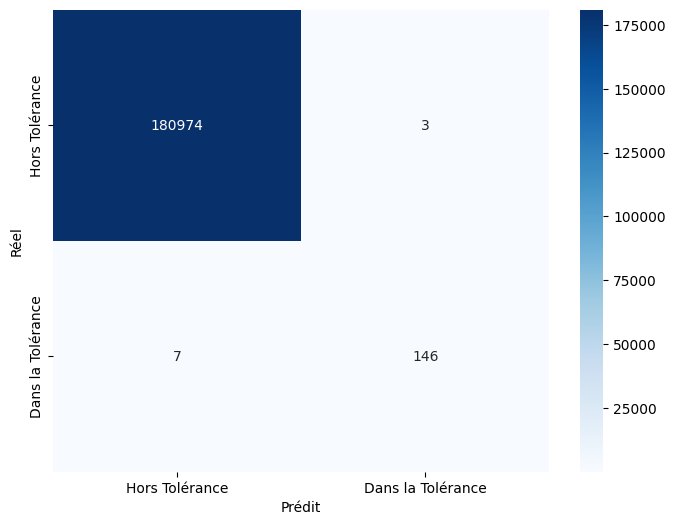

In [9]:
#Matrice de confusion
# Définition de la fonction pour obtenir la matrice de confusion avec seuil de tolérance
def confusion_matrix_with_tolerance(y_true, y_pred, tolerance=0.1):
    y_true_discrete = np.round(y_true)
    y_pred_discrete = np.round(y_pred)
    cm = confusion_matrix(y_true_discrete <= tolerance, y_pred_discrete <= tolerance)
    return cm

# Calcul de la matrice de confusion
cm = confusion_matrix_with_tolerance(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hors Tolérance', 'Dans la Tolérance'], yticklabels=['Hors Tolérance', 'Dans la Tolérance'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
#plt.title('Matrice de Confusion')
plt.show()


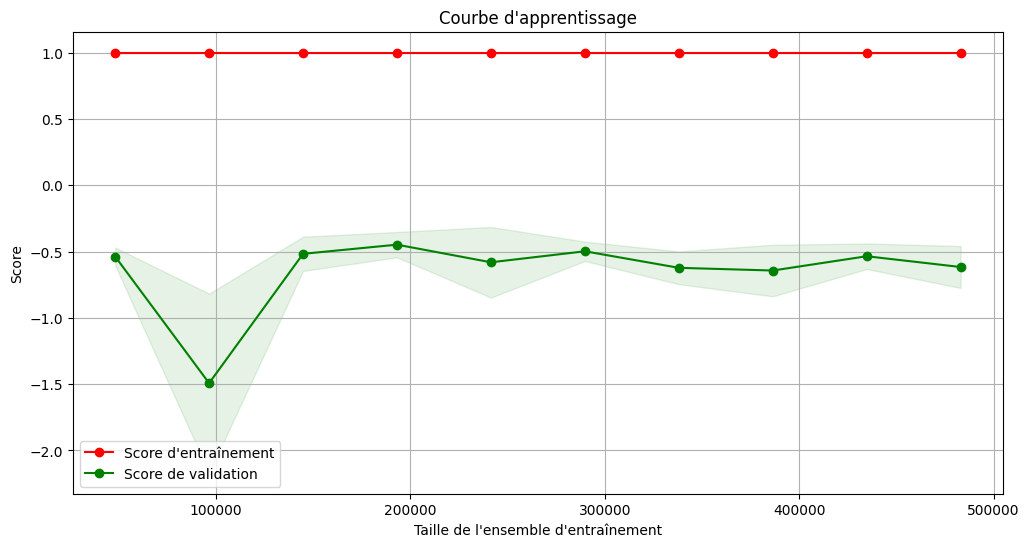

In [10]:
#Courbe d'apprentissage
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='Score de validation')

plt.legend(loc='best')
plt.show()


In [11]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialisation du régresseur Random Forest avec 100 arbres
clf = RandomForestRegressor(n_estimators=100)

# Entraînement du régresseur sur les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = clf.predict(X_test)

# Calcul de l'erreur quadratique moyenne du modèle
mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

# Définir une fonction pour calculer la précision dans une tolérance donnée
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)

# Calculer la précision avec une tolérance de 10%
accuracy = regression_accuracy(y_test, y_pred, tolerance=0.1)
print("Accuracy ", accuracy)




Accuracy  0.9839176282228234


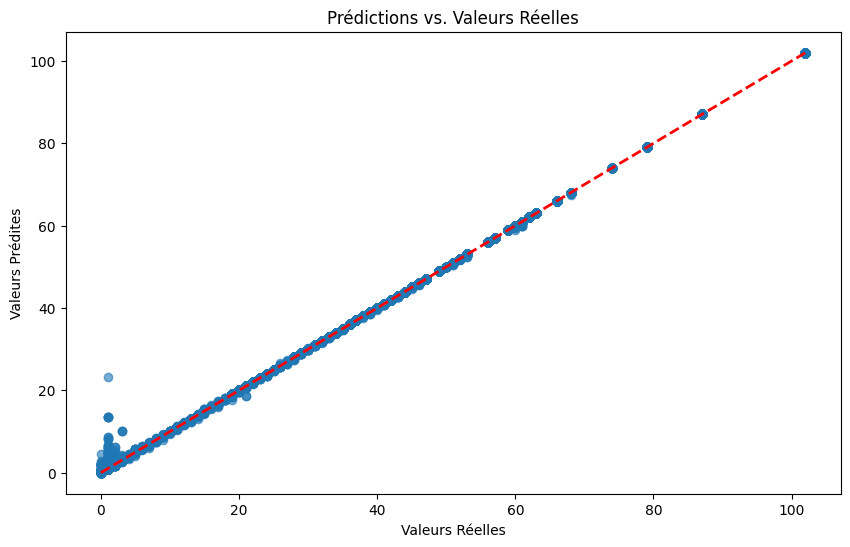

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Prédictions vs. Valeurs Réelles')
plt.show()


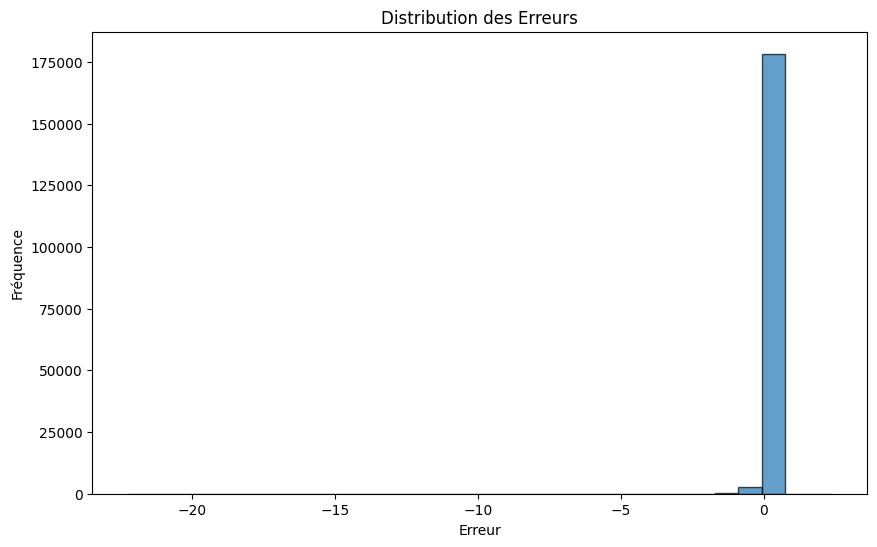

In [13]:
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.title('Distribution des Erreurs')
plt.show()


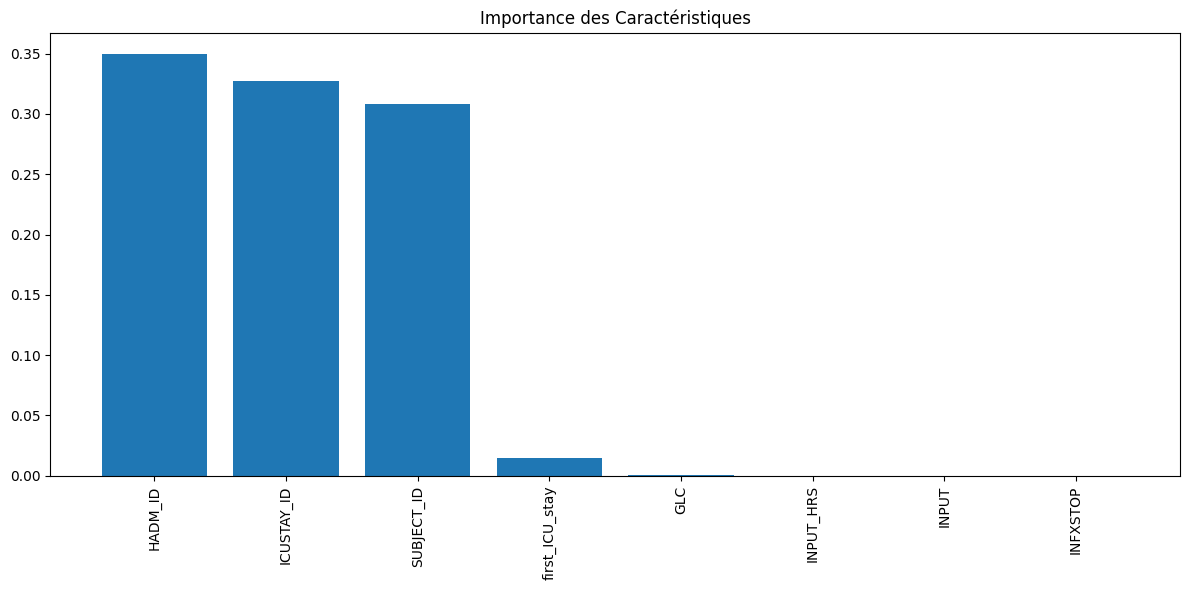

In [14]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title('Importance des Caractéristiques')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


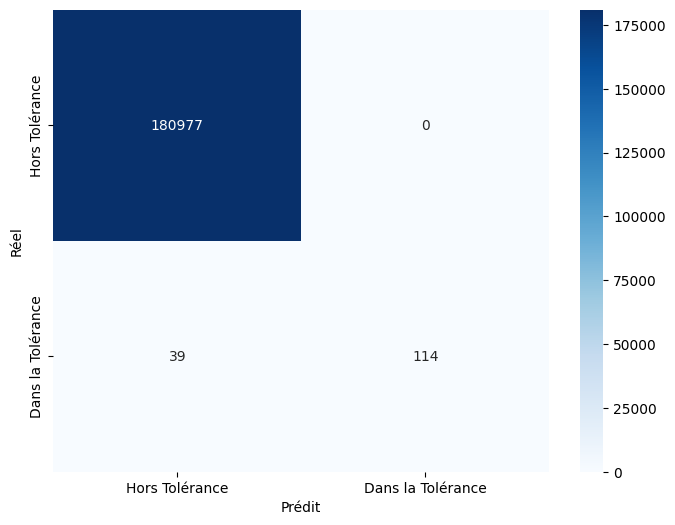

In [15]:
#Matrice de confusion
# Définition de la fonction pour obtenir la matrice de confusion avec seuil de tolérance
def confusion_matrix_with_tolerance(y_true, y_pred, tolerance=0.1):
    y_true_discrete = np.round(y_true)
    y_pred_discrete = np.round(y_pred)
    cm = confusion_matrix(y_true_discrete <= tolerance, y_pred_discrete <= tolerance)
    return cm

# Calcul de la matrice de confusion
cm = confusion_matrix_with_tolerance(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hors Tolérance', 'Dans la Tolérance'], yticklabels=['Hors Tolérance', 'Dans la Tolérance'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
#plt.title('Matrice de Confusion')
plt.show()


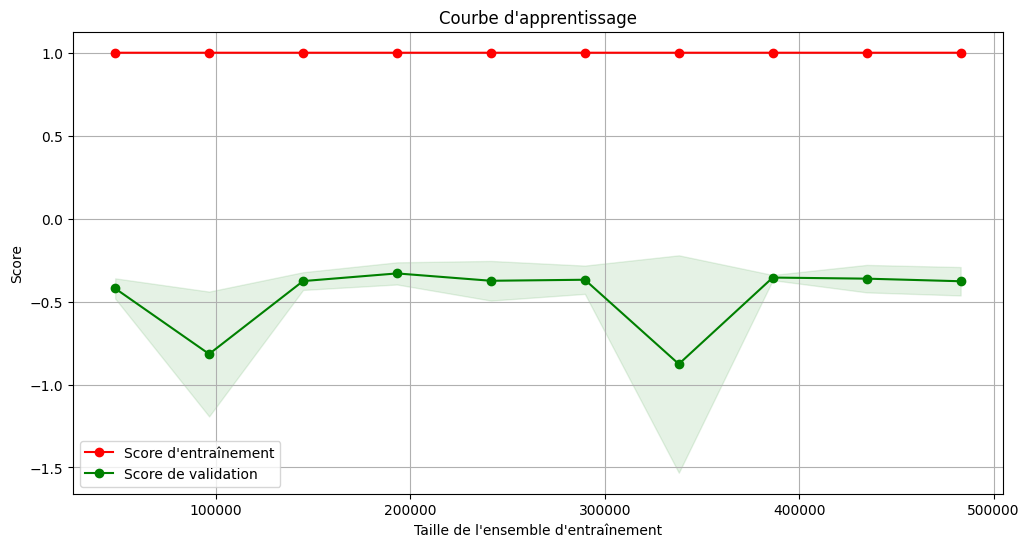

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='Score de validation')

plt.legend(loc='best')
plt.show()
